<a href="https://colab.research.google.com/github/GastonRAraujo/Materia-Ap_Maq/blob/master/TP5/Beer_recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.2)


In [2]:
#imports
import numpy as np
import pandas as pd

#import viz
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib import style
plt.style.use('seaborn')   #lo uso para cmabiar el background de las figuras porque uso dark mode

from sklearn.model_selection import train_test_split

In [229]:
#style.use('seaborn') or plt.style.use('seaborn')

In [3]:
import pandas as pd
beer_reviews_1 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_1.csv")
beer_reviews_1.head(5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
beer_reviews_2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_2.csv")
beer_reviews_2.head(3)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,147,Stone Brewing Co.,1283263116,4.0,4.0,4.0,Tilley4,American Barleywine,4.5,4.0,Stone Old Guardian Barley Wine Style Ale 2010,11.1,56068
1,147,Stone Brewing Co.,1283104309,4.0,4.0,4.0,kzoobrew,American Barleywine,4.5,4.0,Stone Old Guardian Barley Wine Style Ale 2010,11.1,56068
2,147,Stone Brewing Co.,1283041969,4.0,4.0,4.0,atsprings,American Barleywine,3.5,4.0,Stone Old Guardian Barley Wine Style Ale 2010,11.1,56068


Unifico ambos dataframes

In [5]:
df = pd.concat([beer_reviews_1, beer_reviews_2], ignore_index=True)

df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


Vemos que hay distintos tipos de datos, desde numérico hasta texto...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


Vemos que hay valores faltantes en las distintas columnas.

Ahora buscamos datos faltantes...

In [7]:
nulls = pd.isna(df).sum()

nulls

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [8]:
missing = pd.isna(df['brewery_name'])

print(df[missing])

         brewery_id brewery_name  ...  beer_abv  beer_beerid
651565         1193          NaN  ...       5.0        67503
659293         1193          NaN  ...       7.2        63658
659299         1193          NaN  ...       5.4        63215
659300         1193          NaN  ...       4.8        63557
659301         1193          NaN  ...       5.4        63256
659302         1193          NaN  ...       5.9        63459
659303         1193          NaN  ...       5.3        63324
659304         1193          NaN  ...       5.3        63324
659305         1193          NaN  ...       5.3        63324
1391043          27          NaN  ...       3.8           60
1391049          27          NaN  ...       8.5         3394
1391050          27          NaN  ...       8.5         3394
1391051          27          NaN  ...       7.2        75135
1391052          27          NaN  ...       7.2        75135
1391053          27          NaN  ...       7.0        75137

[15 rows x 13 columns]


A partir de aquí voy a plantear dos posibilidades:
una donde elimino completamente las filas donde algun dato sea NaN, y otra donde los reemplazo por la media.

Elimino los NaN

In [9]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB




---


Ahora voy a chequear que columnas me sirven para identificar una cerveza dada:

Poseemos "ID" y nombre tanto de cervezas como de cervecerías, por lo que utilizaremos solo uno de los dos.

In [10]:
print( 'Cervezas' )
print( 'IDs:', df[ 'beer_beerid' ].nunique() )
print( 'Nombres:', df[ 'beer_name' ].nunique() )

Cervezas
IDs: 49000
Nombres: 44075


vemos q hay más ids que nombres por lo que una misma cerveza tiene más de un ID

In [11]:
print( 'Cervecerias' )
print( 'IDs:', df[ 'brewery_id' ].nunique() )
print( 'Nombres:', df[ 'brewery_name' ].nunique() )

Cervecerias
IDs: 5230
Nombres: 5155


lo mismo sucede con el id de las cevecerías...

In [12]:
df = df.drop(columns = ['brewery_id', 'beer_beerid'])

Para realizar el clustering no utilizaré esas columnas.

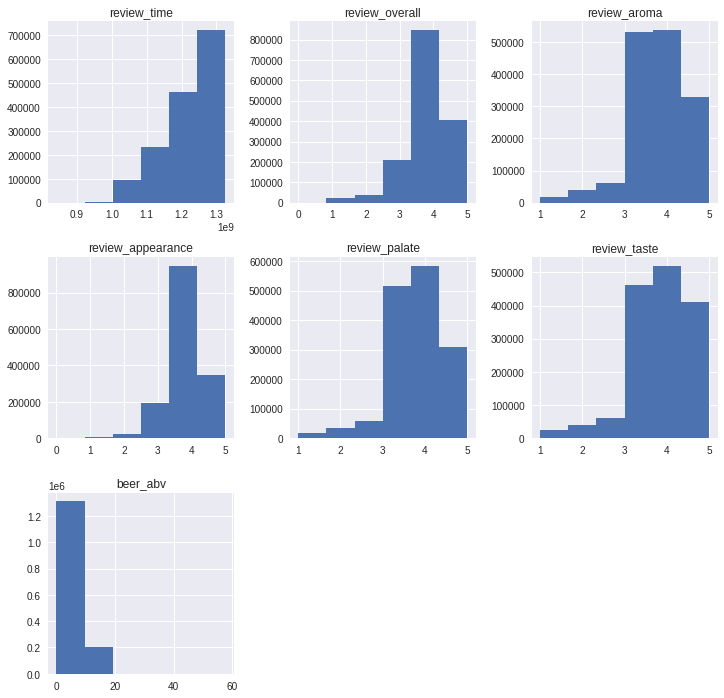

In [13]:
df.hist(figsize=(12,12), bins=6)

plt.show()

Investigando sobre DataFrame.drop() encontré que es posible utilizarlo para eliminar datos duplicados por lo que procederé a realizarlo.
Para eso ordeno por fecha y me quedo con la última reseña que se haya hecho por ser más actual.

In [14]:
#La fecha no esta bien fomateada por lo procedo a cambiar el tipo de variable
#df[ 'review_time' ] = pd.to_datetime( df[ 'review_time' ], unit = 's' )

#reordeno por fecha
df = df.sort_values('review_time', ascending = False)

#df.info()
size_antes = df.shape

#elimino duplicados
df = df.drop_duplicates(subset=['brewery_name', 'review_profilename', 'beer_name'], keep='first')


print('Se han eliminado {} duplicados'.format(size_antes[0]-df.shape[0]))

Se han eliminado 14570 duplicados


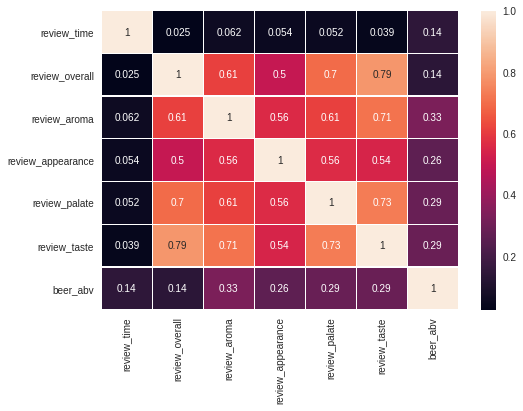

In [15]:
sns.heatmap(df.corr(), linewidths=.3, annot=True)

In [16]:
list(df['beer_style'].unique())

['American Pale Ale (APA)',
 'Kölsch',
 'Oatmeal Stout',
 'Scotch Ale / Wee Heavy',
 'Quadrupel (Quad)',
 'American Double / Imperial IPA',
 'German Pilsener',
 'Saison / Farmhouse Ale',
 'American Adjunct Lager',
 'American Amber / Red Ale',
 'Belgian Pale Ale',
 'American Stout',
 'American IPA',
 'English Stout',
 'American Wild Ale',
 'Russian Imperial Stout',
 'Gueuze',
 'American Brown Ale',
 'Baltic Porter',
 'Hefeweizen',
 'American Double / Imperial Stout',
 'Weizenbock',
 'Maibock / Helles Bock',
 'Old Ale',
 'Bock',
 'Tripel',
 'Extra Special / Strong Bitter (ESB)',
 'American Porter',
 'Belgian Strong Pale Ale',
 'Winter Warmer',
 'English Bitter',
 'Märzen / Oktoberfest',
 'English Barleywine',
 'Doppelbock',
 'Lambic - Fruit',
 'American Barleywine',
 'Gose',
 'American Blonde Ale',
 'Belgian Strong Dark Ale',
 'Fruit / Vegetable Beer',
 'American Strong Ale',
 'Belgian IPA',
 'Wheatwine',
 'Schwarzbier',
 'American Black Ale',
 'Dubbel',
 'Japanese Rice Lager',
 'English

Vemos que "beer_style" a secas no es una buena variable para clustering. Se podría realizar un proceso de clustering para determinar un "espacio vectorial" para esta variable.

En principio pensaba considerar el "review_time" para ver como este afectaba pero decidí no utilizarlo por ahora. Si realizo otra versión lo incluiré.

In [17]:
df_data = df.drop(columns=['brewery_name', 'review_profilename', 'beer_style', 'review_time'])
df_data = df_data.groupby("beer_name").mean()
df_data.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
beer_name,,,,,,
! (Old Ale),4.0,4.5,4.00,4.000000,4.5,8.2
"""100""",4.0,4.0,4.00,4.000000,4.4,10.0
"""100"" Pale Ale",4.0,4.0,3.50,4.000000,4.0,6.6
"""12"" Belgian Golden Strong Ale",4.0,3.5,4.25,4.750000,4.5,9.0
"""33"" Export",3.0,3.0,3.00,3.166667,3.0,4.8


In [18]:
X = df_data.to_numpy()
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print('X_train.shape = ', X_train.shape)
print('X_test.shape = ', X_test.shape)

X_train.shape =  (35260, 6)
X_test.shape =  (8815, 6)


Ahora voy a hacer clustering para agrupar distintos tipos de cervezas... Apartir de ahí encontraré la mejor de cada cluster

Utilizando la métrica de "Distorsion" realizo una "elbow curve" para encontrar el número óptimo de clusters. Para eso utilizo la biblioteca yellowbrick que cuenta con funciones para realizar la curva y encontrar el valor de "k" que mejor se ajuste.


Distorsion: computes the sum of squared distances from each point to its assigned center.

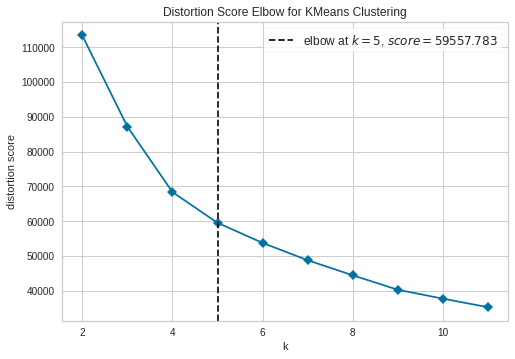

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show() 

In [20]:
kmeans = KMeans(init='k-means++', n_clusters=visualizer.elbow_value_, n_init=10)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Una vez listo el clasificador poseo a obtener todas la etiquetas de mis datos. Y a obtener las mejores cervezas para cada categoría

In [21]:
Labels = kmeans.predict(X)

df_data['category']=Labels

df_data.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,category
beer_name,,,,,,,
! (Old Ale),4.0,4.5,4.00,4.000000,4.5,8.2,1
"""100""",4.0,4.0,4.00,4.000000,4.4,10.0,1
"""100"" Pale Ale",4.0,4.0,3.50,4.000000,4.0,6.6,4
"""12"" Belgian Golden Strong Ale",4.0,3.5,4.25,4.750000,4.5,9.0,1
"""33"" Export",3.0,3.0,3.00,3.166667,3.0,4.8,3


Agrupo las cervezas por categoria y luego obtengo cada grupo.
Agrupo cada cerveza obteniendo un promedio de los distintos valores de review y oredeno el dataframe para filtrar a los que "en promedio" obtuvieron la mejor review "overall".

In [22]:
grouped_df = df_data.groupby("category")
best = [None]*5

for i in range(5):
  Group = grouped_df.get_group(i)
  Group = Group.sort_values(by="review_overall", ascending=False)
  best[i] = ', '.join(Group.head(3).index.tolist())
  print("Las mejores cervezas en la categoria {} son: {}".format(i,best[i]))


Las mejores cervezas en la categoria 0 son: Pioneer Bavarian Wheat, Soo's Lug, Great Lakes Truth Justice And The American Ale
Las mejores cervezas en la categoria 1 son: Hopnitized, Brett Reverend, Birra Del Linchetto Birra Dark
Las mejores cervezas en la categoria 2 son: Chicago Terminal Oatmeal Bourbon Stout, King's Ale, Nine Tailed Fox
Las mejores cervezas en la categoria 3 son: Liq Natural 10P, Durty's Brew, Víking Jólabjór
Las mejores cervezas en la categoria 4 son: Høst Bryg Kirsebær, Harp Strong, Snow Daze IPA


Podemos pedirle al usuario que nos diga cual es su cerveza favorita* y a partir de ahi recomendarle alguna otra de la misma categoria:

*puede extenderse a que indique segun la moda (valor más usual) de las categorias obtenidas en vez de ofrecerle las mejores de todas las categorias obtenidas.

In [32]:
cerveza_fav = input("¿Cual es su cerveza favorita? ").split(", ")
print("\n")
#filtro cervezas que no esten:
validas = []
for i in cerveza_fav:
  if i in df_data.index:
    validas.append(i)
cerveza_fav = validas

if len(cerveza_fav) == 0:
  print("La entrada no es valida...")

else:
  assigned_categories = df_data.loc[cerveza_fav]["category"]

  #si solo introdujo una cerveza
  if len(cerveza_fav) == 1:  
    assigned_category = int(assigned_categories.values)
    print("Si te gusta {}, deberias probar {} \n".format(cerveza_fav[0],best[assigned_category]))


  #si introdujo más de una cerveza busco repetidos y unifico
  else:
    myset = set(assigned_categories.values)
    for i in myset:

      cervs = ', '.join(assigned_categories[assigned_categories == i].index.tolist())

      print("Si te gusta {}, deberias probar {} \n".format(cervs,best[i]))

¿Cual es su cerveza favorita? Acme Anvil Brown Ale, Bad Boy, Cab Cherry Man, asdwq


Si te gusta Bad Boy, Cab Cherry Man, deberias probar Hopnitized, Brett Reverend, Birra Del Linchetto Birra Dark 

Si te gusta Acme Anvil Brown Ale, deberias probar Høst Bryg Kirsebær, Harp Strong, Snow Daze IPA 





---



Podemos encontrar las mejores cervezas para algun gusto particular observando los valores de "aroma", "apariencia", "sabor", "paladar" y se podría incluir porcentaje de alcohol.


Para eso creamos valores de "review" que combinen las caracteristicas deseadas.

Ej) Si los gustos de preferencia son "paladar y sabor" podemos crear un valor que mezcle ambas caracteristicas como puede ser "paladar + sabor" o "paladar x sabor"

In [33]:
df_data["palate_taste"] = (df_data['review_palate']+df_data['review_taste']) /2

df_data.sort_values(by="palate_taste").head(3)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,category,palate_taste
beer_name,,,,,,,,
Ivrest,1.0,1.5,1.5,1.0,1.0,5.0,3,1.0
Yanjing Lemon Beer,1.5,1.0,1.0,1.0,1.0,2.5,3,1.0
Geelong Our Original Pale Ale,1.0,1.0,1.0,1.0,1.0,4.5,3,1.0




---

Veamos cuales cervecerías poseen mejores reviews "overall" en promedio

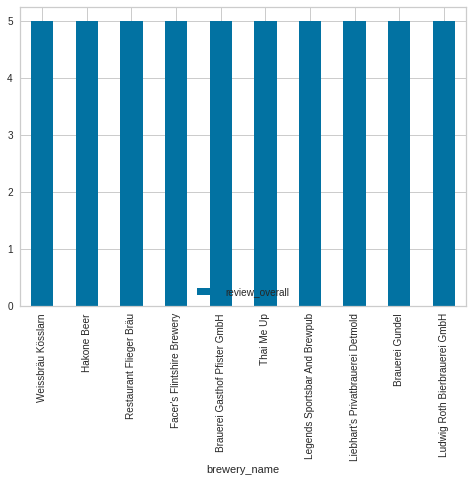

In [34]:
df2 = pd.concat([beer_reviews_1, beer_reviews_2], ignore_index=True)

df2 = df2[["brewery_name", "review_overall"]]

best_reviews = df2.groupby("brewery_name").mean().reset_index()
best_reviews = best_reviews.sort_values(by="review_overall", ascending=False).head(10)

best_reviews.plot.bar(x = 'brewery_name', y = "review_overall")

Asi podemos buscar las mejores cervezas, estilos o cervecerías segun su puntaje medio overall o en alguna/s categoría/s.

Por último obtengamos las cervecerías que producen las cervezas con mayor ABV

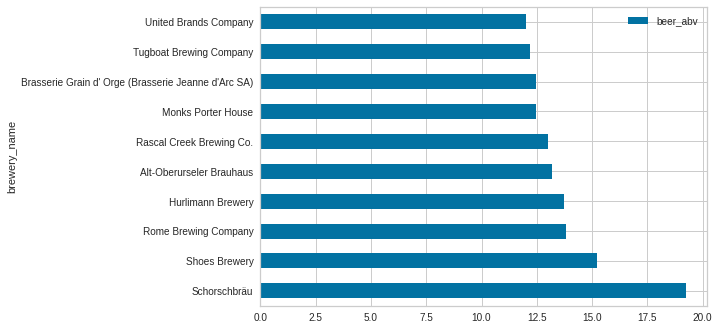

In [35]:
df2 = pd.concat([beer_reviews_1, beer_reviews_2], ignore_index=True)

df2 = df2[["brewery_name", "beer_abv"]]

best_reviews = df2.groupby("brewery_name").mean().reset_index()
best_reviews = best_reviews.sort_values(by="beer_abv", ascending=False).head(10)

best_reviews.plot.barh(x = 'brewery_name', y = "beer_abv")

Mientras que las cervezas con mayor ABV son:

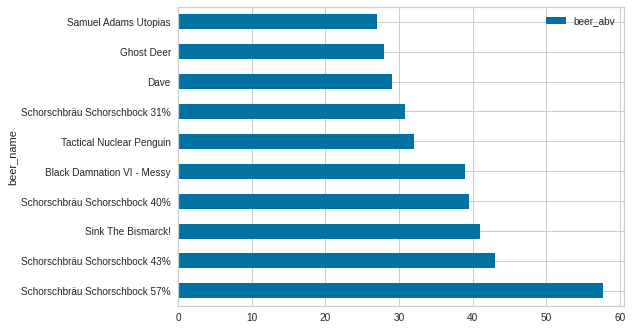

In [36]:
df2 = pd.concat([beer_reviews_1, beer_reviews_2], ignore_index=True)

df2 = df2[["beer_name", "beer_abv"]]

best_reviews = df2.groupby("beer_name").mean().reset_index()
best_reviews = best_reviews.sort_values(by="beer_abv", ascending=False).head(10)

best_reviews.plot.barh(x = 'beer_name', y = "beer_abv")